In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set_style('white')

In [16]:
# load features and labels
df_feat = pd.read_csv('feature.csv', index_col=0)
df_label = pd.read_csv('label.csv', index_col=0)

In [17]:
# split training/test name
unique_names = list(set([path.split('/')[0] for path in df_feat.index]))
name_train, name_test = train_test_split(unique_names, test_size = 0.1, random_state = 0)
name_train, name_test = set(name_train), set(name_test)
# split training/test images
idx_train = [path.split('/')[0] in name_train for path in df_feat.index]
idx_test = [path.split('/')[0] in name_test for path in df_feat.index]
X_train, Y_train = df_feat[idx_train], df_label[idx_train]
X_test, Y_test = df_feat[idx_test], df_label[idx_test]

In [23]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(128, 128),max_iter = 5000, verbose=True, tol=1e-4, activation='relu')
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
score = clf.predict_proba(X_test)

df_pred = pd.DataFrame(pred, columns=df_label.columns, index=Y_test.index)
df_score = pd.DataFrame(score, columns=df_label.columns, index=Y_test.index)

Iteration 1, loss = 40.46213128
Iteration 2, loss = 35.11979722
Iteration 3, loss = 32.93996757
Iteration 4, loss = 32.00492815
Iteration 5, loss = 31.32414716
Iteration 6, loss = 30.88439587
Iteration 7, loss = 30.60891259
Iteration 8, loss = 30.38312281
Iteration 9, loss = 30.22641831
Iteration 10, loss = 30.05569287
Iteration 11, loss = 29.89719736
Iteration 12, loss = 29.74092951
Iteration 13, loss = 29.63339967
Iteration 14, loss = 29.53694943
Iteration 15, loss = 29.42439407
Iteration 16, loss = 29.32443221
Iteration 17, loss = 29.26769968
Iteration 18, loss = 29.20799645
Iteration 19, loss = 29.11834348
Iteration 20, loss = 29.06533771
Iteration 21, loss = 28.99166923
Iteration 22, loss = 28.92377733
Iteration 23, loss = 28.89107365
Iteration 24, loss = 28.81772105
Iteration 25, loss = 28.77240476
Iteration 26, loss = 28.74881923
Iteration 27, loss = 28.68213362
Iteration 28, loss = 28.64383079
Iteration 29, loss = 28.61881188
Iteration 30, loss = 28.58291037
Iteration 31, loss 

In [14]:
# save model
import pickle
save_path = 'face_model.pkl'
with open(save_path, 'wb') as f:
    pickle.dump([clf, df_label.columns.tolist()], f)

In [10]:
def plot_roc(attr, target, score):
    """Plot a ROC curve and show the accuracy score and the AUC"""
    fig, ax = plt.subplots()
    auc = roc_auc_score(target, score)
    acc = accuracy_score(target, (score >= 0.5).astype(int))
    fpr, tpr, _ = roc_curve(target, score)
    plt.plot(fpr, tpr, lw = 2, label = attr.title())
    plt.legend(loc = 4, fontsize = 15)
    plt.title(('ROC Curve for {attr} (Accuracy = {acc:.3f}, AUC = {auc:.3f})'
               .format(attr = attr.title(), acc= acc, auc = auc)),
              fontsize = 15)
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.show()
    return fig

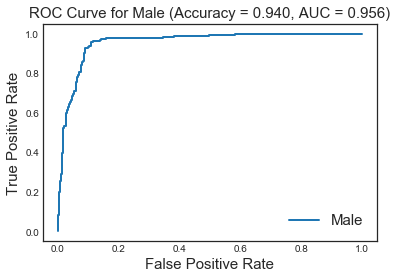

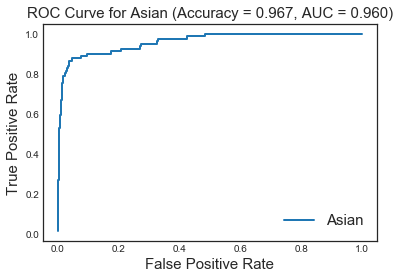

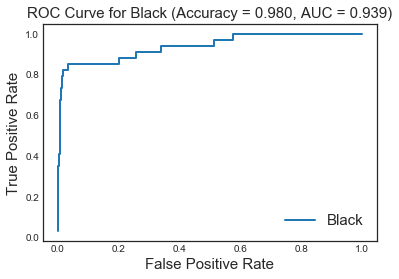

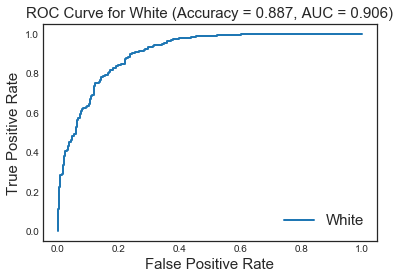

In [11]:
# plot ROC curves
cols = ['Male', 'Asian', 'Black', 'White']
for attr in cols:
    target = Y_test[attr]
    score = df_score[attr]
    fig = plot_roc(attr, target, score)